## Test for Chebyshev differentiation matrices

Let consider a model PDE

$$
\Delta u(x) = f(x),
\quad
x \in [0, 1],
\quad
u(0) = 0,
\quad
u(1) = 0,
\quad
f(x) = -\pi^2 \sin{(\pi x)},
$$
with known exact solution
$$
u(x) = \sin{(\pi x)}.
$$

In [1]:
import sys
import time

import numpy as np
import matplotlib.pyplot as plt

import tt

sys.path.append('./../lib')
from intertrain import Intertrain

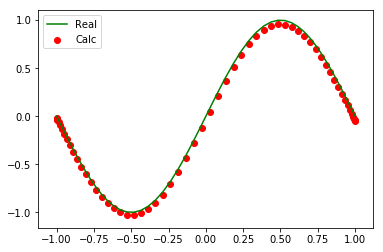

Error: 5.76e-02    


In [2]:
def u(x):
    return np.sin(np.pi*x)

def f(x):
    return -1. * np.pi * np.pi * np.sin(np.pi*x)

IT = Intertrain(n=[60], l=[ [-1., 1.] ])

x = IT.points_1d()
D = IT.dif2()

u_real = u(x)
u_calc = np.linalg.solve(D, f(x))

plt.plot(x, u_real, c='g', label='Real')
plt.scatter(x, u_calc, c='r', label='Calc')
plt.legend(loc='best')
plt.show()

e = np.linalg.norm(u_real-u_calc) / np.linalg.norm(u_real)
print('Error: %-12.2e'%e)

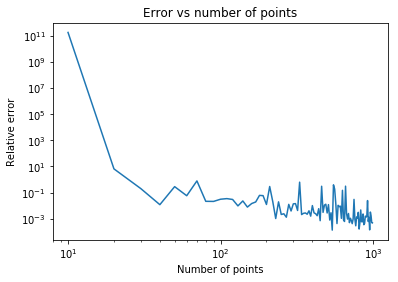

In [3]:
n_list = np.arange(10, 1000, 10)
e_list = []

for n in n_list:
    IT = Intertrain(n=[n], l=[ [-1., 1.] ])

    x = IT.points_1d()
    D = IT.dif2()

    u_real = u(x)
    u_calc = np.linalg.solve(D, f(x))
    
    e = np.linalg.norm(u_real-u_calc) / np.linalg.norm(u_real)
    e_list.append(e)
    
plt.plot(n_list, e_list)
plt.title('Error vs number of points')
plt.xlabel('Number of points')
plt.ylabel('Relative error')
plt.semilogx()
plt.semilogy()
plt.show()

Let visualize the matrix for a different number of grid points

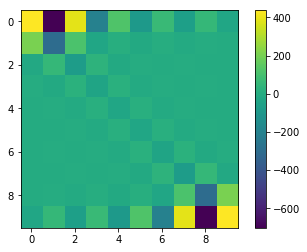

In [4]:
IT = Intertrain(n=[10], l=[ [-1., 1.] ])
D = IT.dif2()
plt.imshow(D)
plt.colorbar()
plt.show()

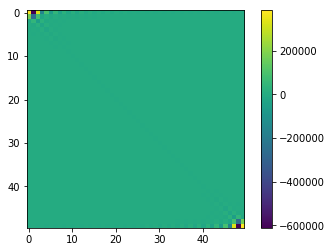

In [5]:
IT = Intertrain(n=[50], l=[ [-1., 1.] ])
D = IT.dif2()
plt.imshow(D)
plt.colorbar()
plt.show()

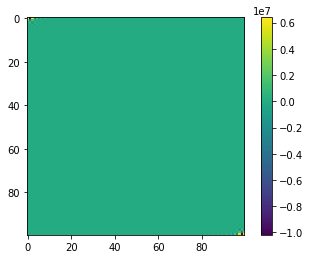

In [6]:
IT = Intertrain(n=[100], l=[ [-1., 1.] ])
D = IT.dif2()
plt.imshow(D)
plt.colorbar()
plt.show()